In [2]:
from lsst_efd_client import EfdClient
from lsst.ts import salobj

import asyncio
import numpy as np
import os
import time

from astropy.io import fits
import matplotlib.pyplot as plt

from scipy import interpolate
from scipy import stats

from astropy.time import Time, TimeDelta
import pandas as pd

In [3]:
client = EfdClient('tucson_teststand_efd')

In [4]:
pd_response = pd.read_csv('hamamatsu_responsivity.csv')
area = 100 #mm2
amps_per_watt = float(pd_response[pd_response.wavelength == 440].responsivity)                        
             
def watts_per_mm2(amps):  
    watts_per_mm2 = (amps/amps_per_watt)/area
    return watts_per_mm2                             
   

In [5]:
ScanData_600nm_filen_0 = '/home/parfa30/DATA/ScanData/600nm_full_scan_21x21_2022-04-28T04:11:19.928.csv'
ScanData_600nm_filen_1 = '/home/parfa30/DATA/ScanData/600nm_full_scan_2022-05-19T16:54:06.690.csv'
ScanData_600nm_filen_2 = '/home/parfa30/DATA/ScanData/600nm_full_scan_2_2022-05-19T18:23:45.727.csv'
ScanData_600nm_filen_3 = '/home/parfa30/DATA/ScanData/600nm_full_scan_final_may20.csv'
ScanData_600nm_filen_4 = '/home/parfa30/DATA/ScanData/600nm_full_scan_na12_may20.csv'
ScanData_600nm_filen_5 = '/home/parfa30/DATA/ScanData/600nm_full_scan_may23.csv'
ScanData_600nm_filen_6 = '/home/parfa30/DATA/ScanData/600nm_full_scan_may24.csv'
ScanData_600nm_filen_7 = '/home/parfa30/DATA/ScanData/600nm_full_scan_2_may24.csv'
ScanData_600nm_filen_8 = '/home/parfa30/DATA/ScanData/600nm_full_scan_may25.csv'

In [6]:
names = ['May19','May19_2','May20_NA22','May20_NA11','May23','May24','May24_2','May25'] #'Apr28',
ceny = 670
cenx = 1100

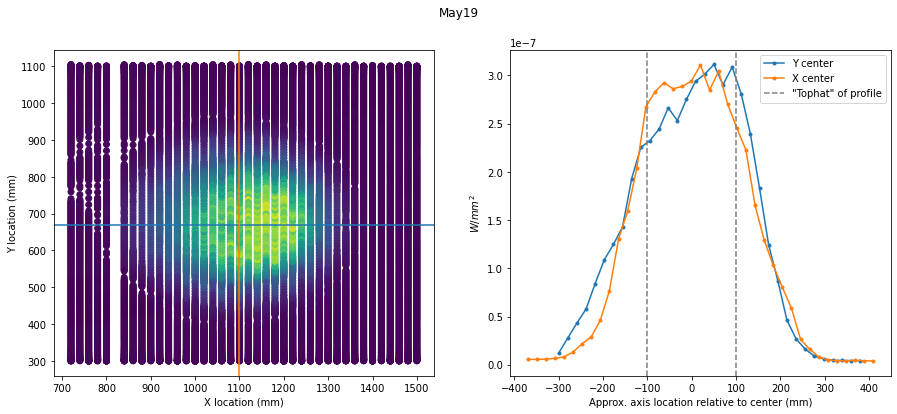

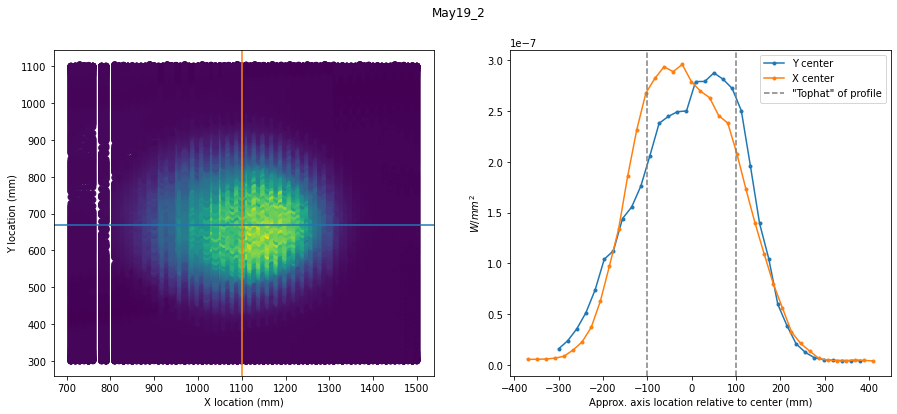

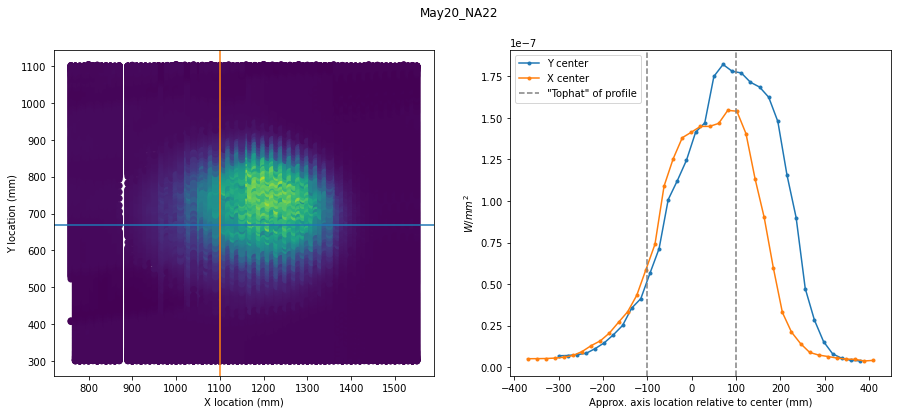

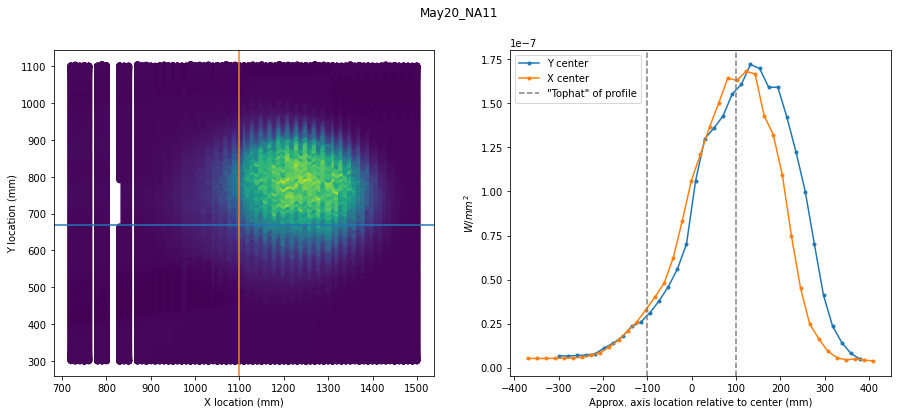

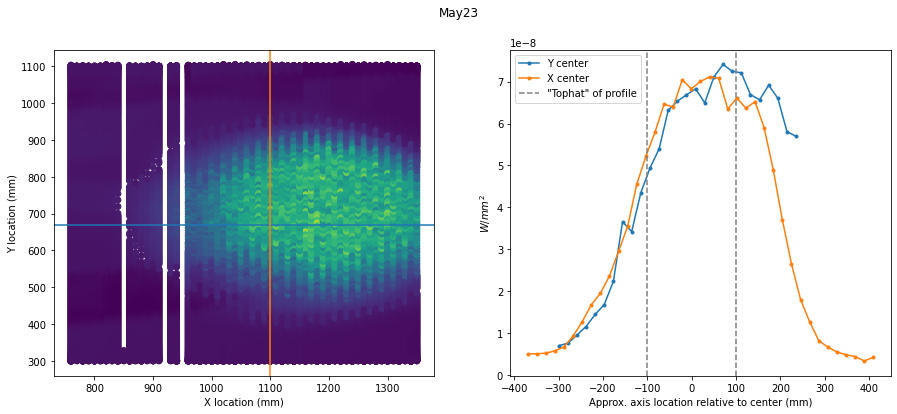

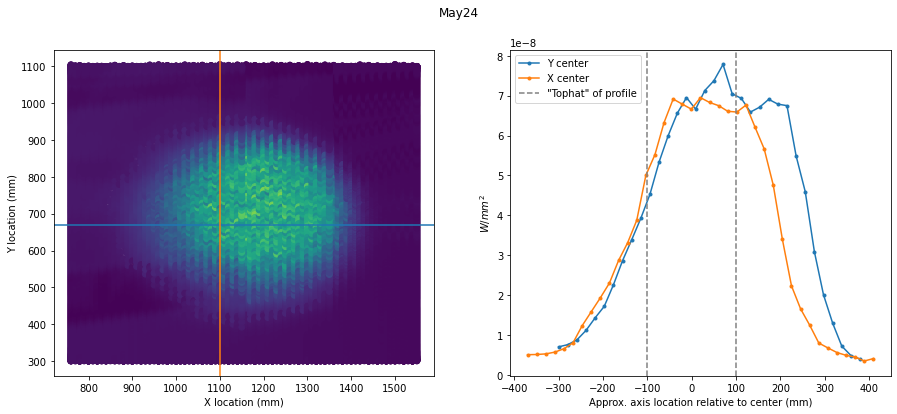

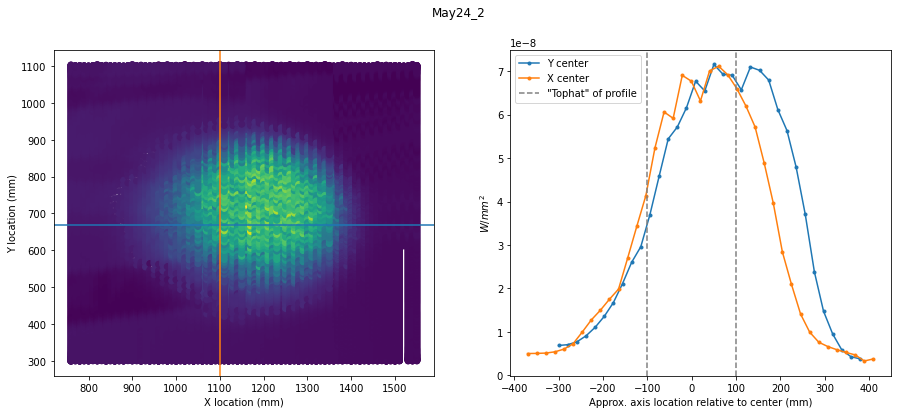

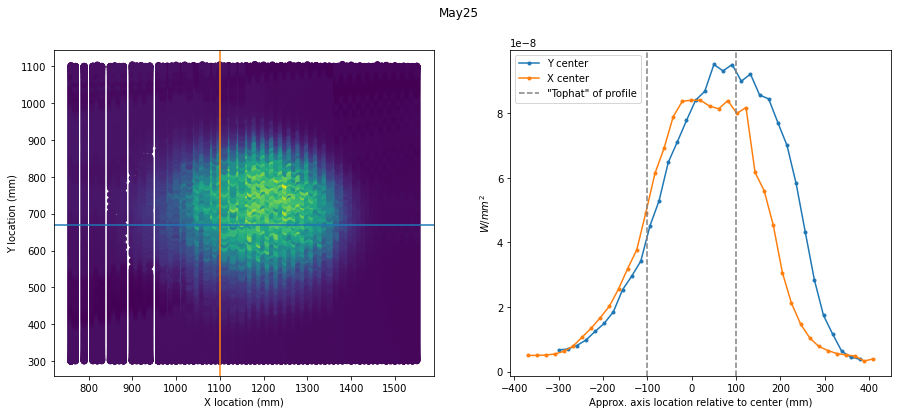

In [7]:
for i, sd_filen in enumerate([ScanData_600nm_filen_1, ScanData_600nm_filen_2, ScanData_600nm_filen_3, 
                        ScanData_600nm_filen_4, ScanData_600nm_filen_5, ScanData_600nm_filen_6, ScanData_600nm_filen_7, ScanData_600nm_filen_8]):
    sd = pd.read_csv(sd_filen)

    try:
        sd = sd[(sd.ypos <1500)&(sd.ypos >300)&(sd.step >0)&(sd.amps <0)&(sd.amps >-10)]
        vals = sd.amps*-1
        x = sd.xpos
        y = sd.ypos
    except:
        sd = sd
        vals = sd['mean']*-1
        x = sd.X
        y = sd.Y
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))
    ax1.scatter(x,y,c=vals)
    ax1.axhline(ceny, c='C0',label='Y center')
    ax1.axvline(cenx, c='C1',label='X center')
    ax1.set_xlabel('X location (mm)')
    ax1.set_ylabel('Y location (mm)')
    binx = np.linspace(800,1500,(1500-800)//20)
    biny = np.linspace(300,1100,(1100-300)//20)
    val,xedge,yedge,binn = stats.binned_statistic_2d(x, y, vals, 'mean', bins=[binx, biny])
    xx,yy = np.meshgrid(xedge[:-1],yedge[:-1])
    xxx = xx.flatten()
    yyy = yy.flatten()
    zzz = val.T.flatten()

    center_y = np.where(np.abs(yyy-ceny)<10)
    center_x = np.where(np.abs(xxx-cenx)<10)
    ax2.plot(xxx[center_y]-cenx, watts_per_mm2(zzz[center_y]),'.-',label='Y center')
    ax2.plot(yyy[center_x]-ceny, watts_per_mm2(zzz[center_x]),'.-', label='X center')
    ax2.axvline(-100,ls='--',color='gray',label='"Tophat" of profile')
    ax2.axvline(100,ls='--',color='gray')
    ax2.set_xlabel('Approx. axis location relative to center (mm)')
    ax2.set_ylabel('$W/mm^{2}$')
    ax2.legend()
    fig.suptitle(names[i])

Text(0.5, 1.0, 'Laser scan at 600nm (center of X axis)')

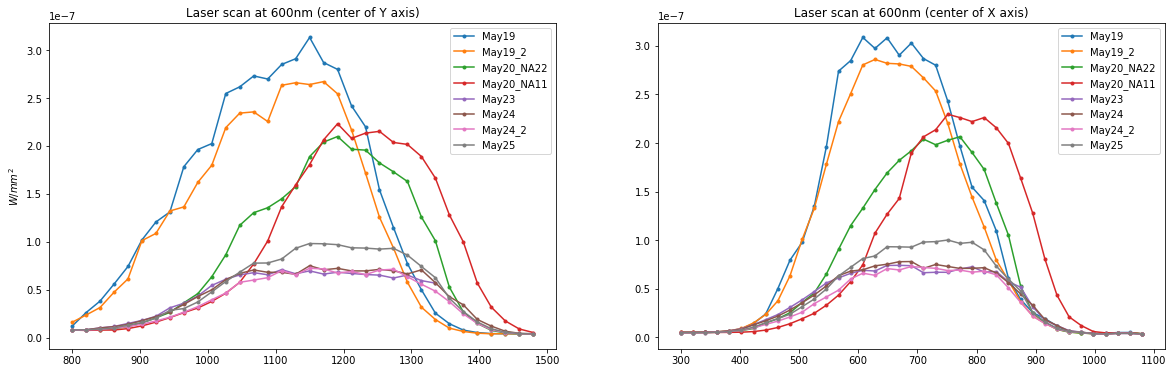

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,6))
for i, sd_filen in enumerate([ScanData_600nm_filen_1, ScanData_600nm_filen_2, ScanData_600nm_filen_3, 
                        ScanData_600nm_filen_4, ScanData_600nm_filen_5, ScanData_600nm_filen_6, ScanData_600nm_filen_7, ScanData_600nm_filen_8]):
    sd = pd.read_csv(sd_filen)
    
    try:
        sd = sd[(sd.ypos <1500)&(sd.ypos >300)&(sd.step >0)&(sd.amps <0)&(sd.amps >-10)]
        vals = sd.amps*-1
        x = sd.xpos
        y = sd.ypos
        sd.sort_values('meas_time')
    except:
        sd = sd
        vals = sd['mean']*-1
        x = sd.X
        y = sd.Y
    
    binx = np.linspace(800,1500,(1500-800)//20)
    biny = np.linspace(300,1100,(1100-300)//20)
    val,xedge,yedge,binn = stats.binned_statistic_2d(x, y, vals, 'mean', bins=[binx, biny])
    xx,yy = np.meshgrid(xedge[:-1],yedge[:-1])
    xxx = xx.flatten()
    yyy = yy.flatten()
    zzz = val.T.flatten()

    center_y = np.where(np.abs(yyy-705)<10)
    center_x = np.where(np.abs(xxx-1170)<10)
    ax1.plot(xxx[center_y], watts_per_mm2(zzz[center_y]),'.-',label=names[i])
    ax2.plot(yyy[center_x], watts_per_mm2(zzz[center_x]),'.-', label=names[i])
    # ax2.axvline(-100)"
    # ax2.axvline(100)
    # fig.suptitle(names[i])
ax1.legend()
ax1.set_title("Laser scan at 600nm (center of Y axis)")
ax1.set_ylabel('$W/mm^{2}$')
ax2.legend()
ax2.set_title("Laser scan at 600nm (center of X axis)")

Text(0.5, 1.0, '450nm')

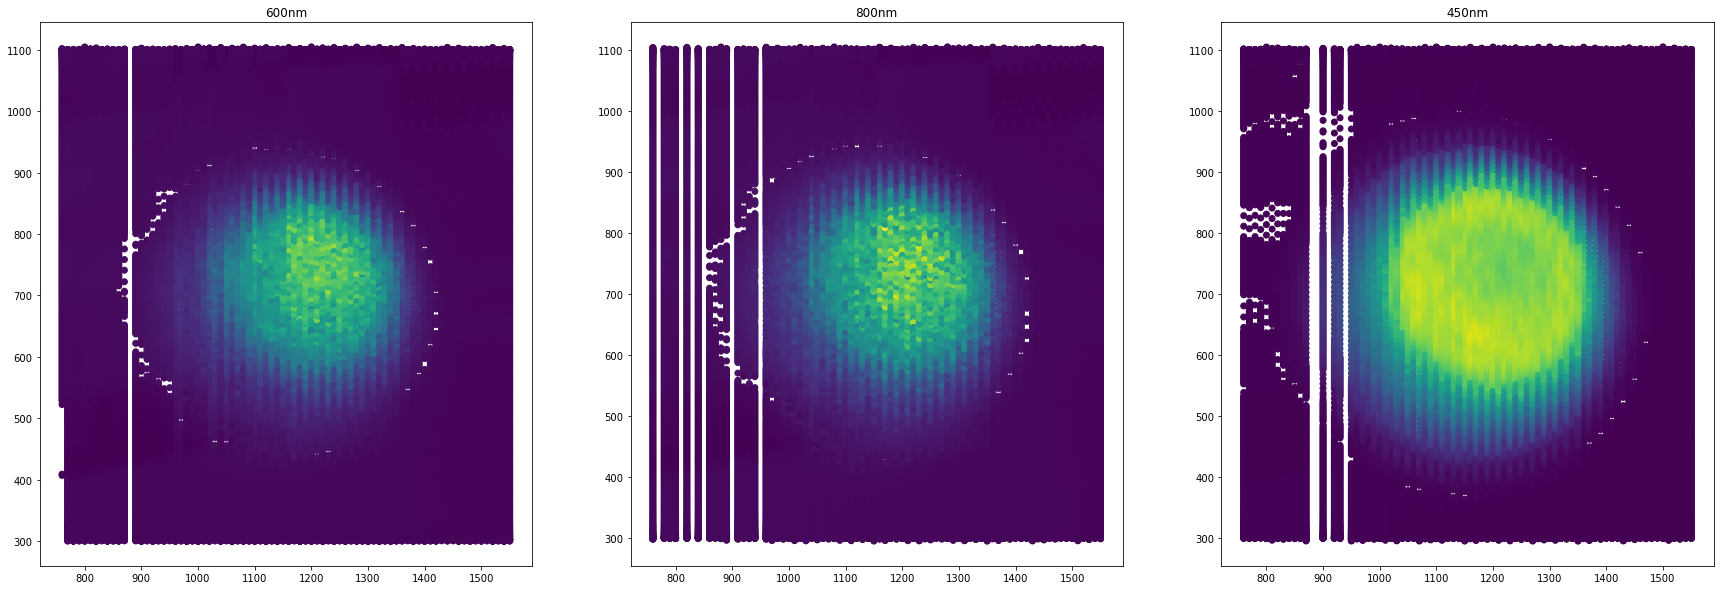

In [88]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize=(30,10))
ax1.scatter(f2.xpos,f2.ypos,c=f2.amps*-1)
ax2.scatter(f3.xpos,f3.ypos,c=f3.amps*-1)
ax3.scatter(f4.xpos,f4.ypos,c=f4.amps*-1)
ax1.set_title('600nm')
ax2.set_title('800nm')
ax3.set_title('450nm')

In [2]:
sd = pd.read_csv(ScanData_600nm_filen_2)
f0 = sd[(sd.ypos <1500)&(sd.ypos >300)&(sd.step >0)&(sd.amps <0)&(sd.amps >-10)]

NameError: name 'ScanData_600nm_filen_2' is not defined

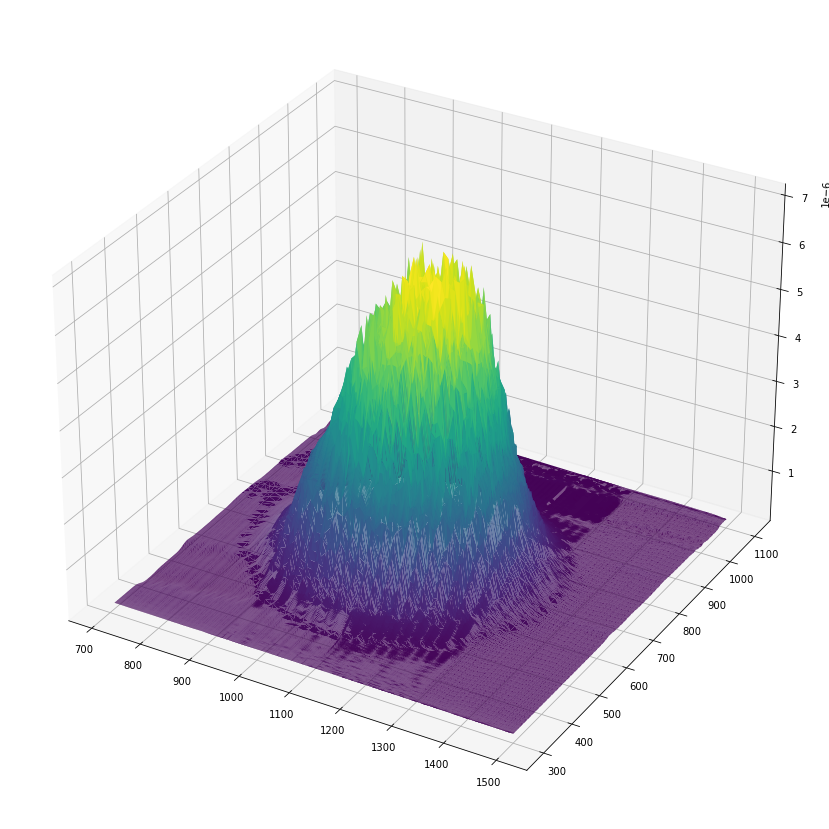

In [15]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(15,15))
ax = plt.axes(projection = '3d')
ax.plot_trisurf(f0.xpos,f0.ypos, f0.amps*-1,cmap = 'viridis')

In [7]:
x = f0.xpos
y = f0.ypos
vals = watts_per_mm2(f0.amps*-1)
binx = np.linspace(800,1500,(1500-800)//10)
biny = np.linspace(300,1100,(1100-300)//10)
val,xedge,yedge,binn = stats.binned_statistic_2d(x, y, vals, 'mean', bins=[binx, biny])
xx,yy = np.meshgrid(xedge[:-1],yedge[:-1])
xxx = xx.flatten()
yyy = yy.flatten()
zzz = val.T.flatten()

print(xxx.shape)
print(yyy.shape)
print(zzz.shape)

new_xy = np.where((np.sqrt((xxx-cenx)**2+(yyy-ceny)**2)<100))[0]
print(new_xy.shape)

(5451,)
(5451,)
(5451,)
(307,)


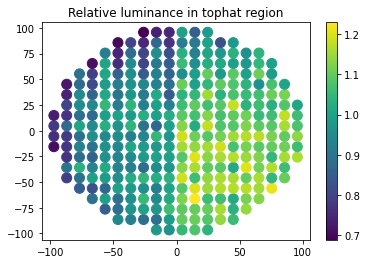

In [8]:
plt.scatter(xxx[new_xy]-cenx,yyy[new_xy]-ceny,c=zzz[new_xy]/np.mean(zzz[new_xy]),s=100)
plt.title('Relative luminance in tophat region')
plt.colorbar()

In [11]:
np.mean(zzz[new_xy])*(1/2)**2

6.357927450026579e-08

In [3]:
import scipy.stats as stats
from scipy.interpolate import interp1d
import scipy.signal as signal

In [5]:
simple = stats.uniform(loc=-100,scale=200)
errscale = 0.25
err = stats.norm(loc=0,scale=errscale)

# NB Kernel support array **MUST** be symmetric about centre of the kernel (error PDF) for this to work right. 
# Support also needs to extend about any significant areas of the component PDFs.
# Here, we just define one massive support for both input PDF, and error PDF (kernel)
# But we can do much better (see later)

#NB step-size determines precision of approximation
delta = 1e-4
big_grid = np.arange(-150,150,delta)

# Cannot analytically convolve continuous PDFs, in general.
# So we now make a probability mass function on a fine grid 
# - a discrete approximation to the PDF, amenable to FFT...
pmf1 = simple.pdf(big_grid)*2.5e-7
pmf2 = err.pdf(big_grid)*2.5e-7
conv_pmf = signal.fftconvolve(pmf1,pmf2,'same') # Convolved probability mass function

conv_pmf = conv_pmf/sum(conv_pmf)

plt.plot(big_grid,pmf1, label='Tophat')
plt.plot(big_grid,pmf2, label='Gaussian error')
plt.plot(big_grid,conv_pmf, label='Sum')
plt.xlim(-150,max(big_grid))
plt.legend(loc='best'), plt.suptitle('PMFs')

(<matplotlib.legend.Legend at 0x7f3e605746d0>, Text(0.5, 0.98, 'PMFs'))

Error in callback <function flush_figures at 0x7f3e6c08c3a0> (for post_execute):


KeyboardInterrupt: 

In [96]:
x = np.linspace(-300,300,600)

In [103]:
xx,yy = np.meshgrid(x,x)

In [112]:
zz = np.zeros((len(xx),len(yy)))

In [113]:
zz[np.where(np.sqrt(xx**2+yy**2)<201)] = 1

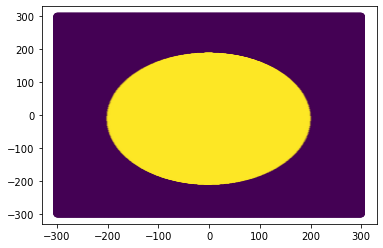

In [114]:
plt.scatter(xx,yy,c=zz)

In [97]:
y = np.zeros(len(x))

In [98]:
y[np.where(np.abs(x)<201)] = 1

In [99]:
def gaussian(a, x, mu, sig):
    return a*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [130]:
def gaus2d(a, x=0, y=0, mx=0, my=0, sx=1, sy=1):
    return a * 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))

In [100]:
g = gaussian(6.35e-8,x, 0, 20)

In [131]:
g2 = gaus2d(6.35e-8,xx,yy,0,0,20,20)

In [139]:
conv_pmf = signal.convolve2d(zz,g2) # Convolved probability mass function

#conv_pmf = conv_pmf/sum(conv_pmf)

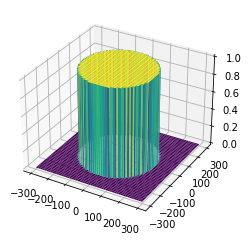

In [137]:
ax = plt.axes(projection = '3d')
ax.plot_surface(xx,yy,zz,cmap = 'viridis')

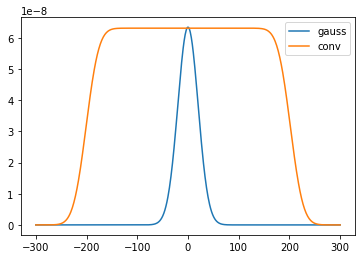

In [102]:
#plt.plot(x,y)
plt.plot(x,g,label='gauss')
plt.plot(x,conv_pmf*2.54e-5,label='conv')
plt.legend()

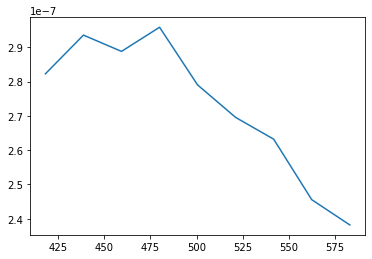

In [42]:
plt.plot(xxx[new_y]-ceny, zzz[center_x][new_y])

In [22]:
y = center_y[0]-ceny
x = center_x[0]-cenx

In [25]:
y

array([-58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46,
       -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33,
       -32, -31, -30, -29, -28, -27, -26, -25])

2.587294685990338e-07 2.72881288732738e-07


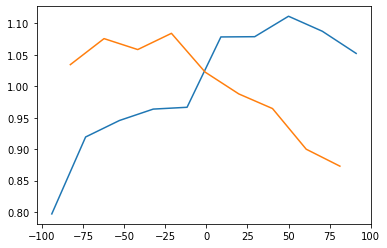

In [47]:
m = np.mean(zzz[center_y][new_x])
plt.plot(xxx[center_y][new_x]-cenx, zzz[center_y][new_x]/m)
m2 = np.mean(zzz[center_x][new_y])
plt.plot(yyy[center_x][new_y]-ceny, zzz[center_x][new_y]/m2)
print(m, m2)

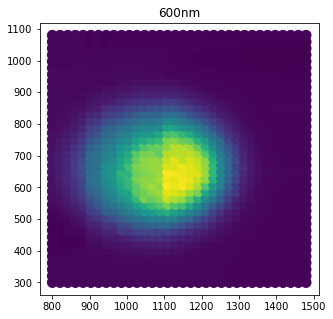

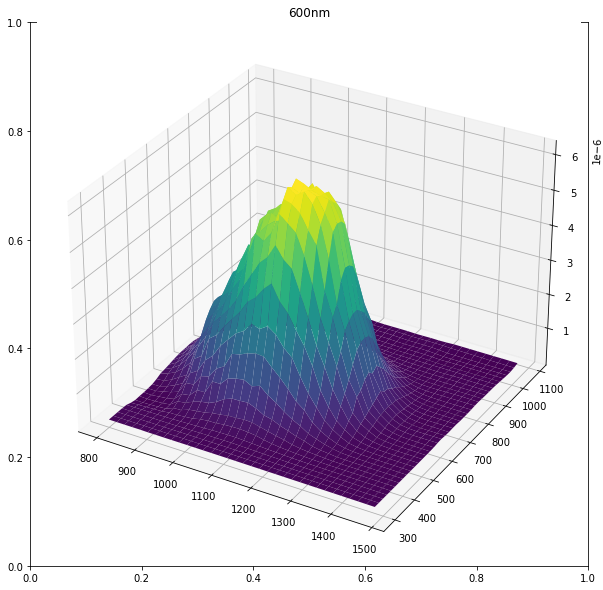

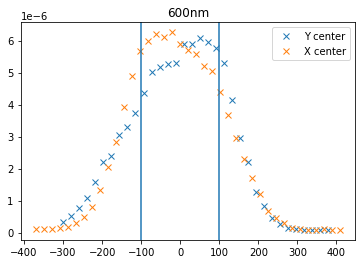

In [31]:
test_name = [600,600,600]
for i,test in enumerate([f0]):
    x = test.xpos
    y = test.ypos
    binx = np.linspace(800,1500,(1500-800)//20)
    biny = np.linspace(300,1100,(1100-300)//20)
    val,xedge,yedge,binn = stats.binned_statistic_2d(x, y, test.amps*-1, 'mean', bins=[binx, biny])
    plt.figure(figsize=(5,5))
    xx,yy = np.meshgrid(xedge[:-1],yedge[:-1])
    plt.scatter(xx,yy,c=val.T,s=100)
    plt.title('{}nm'.format(test_name[i]))
    plt.subplots(figsize=(10,10))
    ax = plt.axes(projection = '3d')
    ax.plot_surface(xx,yy,val.T,cmap = 'viridis')
    ax.set_title('{}nm'.format(test_name[i]))
    xxx = xx.flatten()
    yyy = yy.flatten()
    zzz = val.T.flatten()

    center_y = np.where(np.abs(yyy-670)<10)
    center_x = np.where(np.abs(xxx-1100)<10)
    plt.figure()
    plt.plot(xxx[center_y]-1100, zzz[center_y],'x',label='Y center')
    plt.plot(yyy[center_x]-670, zzz[center_x],'x', label='X center')
    plt.axvline(-100)
    plt.axvline(100)
    plt.title('{}nm'.format(test_name[i]))
    plt.legend()

In [48]:
StabilityData_600 = pd.read_csv('/home/parfa30/DATA/ScanData/600nm_stability_may23.csv')
StabilityData_600_2 = pd.read_csv('/home/parfa30/DATA/ScanData/600nm_stability_scan_may24.csv')

In [53]:
s0 = StabilityData_600_2[StabilityData_600_2.step>0]#[StabilityData_600.amps < 0)]

In [54]:
s0['meas_time'] = pd.to_datetime(s0['meas_time'])

/tmp/ipykernel_3671/2837812233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s0['meas_time'] = pd.to_datetime(s0['meas_time'])


In [55]:
s0_1 = s0[s0.Electrometer==2]
s0_2 = s0[s0.Electrometer==4]
s0_3 = s0[s0.Electrometer==5]

In [60]:
s0_3.head()

,index,start_time,end_time,Electrometer,filename,meas_time,xpos,ypos,amps,step,total_steps,test_name,wave
1306,230,2022-05-24 17:35:23.383302,2022-05-24 17:36:08.598568,5,1653413760.412843_1653413805.5369773.fits,2022-05-24 17:35:23.412843,949.97998,700.080017,-4.758300e-07,1,10,stability_scan,600
1307,231,2022-05-24 17:35:23.383302,2022-05-24 17:36:08.598568,5,1653413760.412843_1653413805.5369773.fits,2022-05-24 17:35:23.512127,949.97998,700.080017,-4.749000e-07,1,10,stability_scan,600
1308,232,2022-05-24 17:35:23.383302,2022-05-24 17:36:08.598568,5,1653413760.412843_1653413805.5369773.fits,2022-05-24 17:35:23.612154,949.97998,700.080017,-4.807700e-07,1,10,stability_scan,600
1309,233,2022-05-24 17:35:23.383302,2022-05-24 17:36:08.598568,5,1653413760.412843_1653413805.5369773.fits,2022-05-24 17:35:23.712183,949.97998,700.080017,-4.823900e-07,1,10,stability_scan,600
1310,234,2022-05-24 17:35:23.383302,2022-05-24 17:36:08.598568,5,1653413760.412843_1653413805.5369773.fits,2022-05-24 17:35:23.812203,949.97998,700.080017,-4.551000e-07,1,10,stability_scan,600


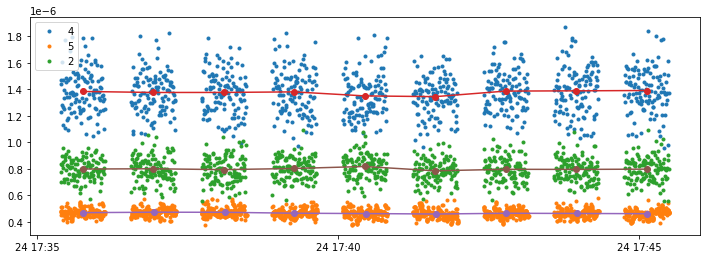

In [65]:
plt.figure(figsize=(12,4))
plt.plot(s0_2.meas_time, s0_2.amps*-1,'.',label='4')
plt.plot(s0_3.meas_time, s0_3.amps*-1,'.',label='5')
plt.plot(s0_1.meas_time, s0_1.amps*-1,'.',label='2')
for s0_ in [s0_2, s0_3, s0_1]:
    means = []
    times = []
    for step in np.unique(s0_.step):
        ss = s0_[s0_.step == step]
        means.append(np.mean(ss.amps)*-1)
        times.append(np.mean(ss.meas_time))
    plt.plot(times, means,'o-')
plt.legend()

In [61]:
np.mean(s0_2.amps)*-1, np.std(s0_2.amps), np.std(s0_2.amps)/np.mean(s0_2.amps)*-1

(1.3764969319271333e-06, 1.6121958998163578e-07, 0.11712310157925593)

In [62]:
np.mean(s0_3.amps)*-1, np.std(s0_3.amps), np.std(s0_3.amps)/np.mean(s0_3.amps)*-1,

(4.6618266800401197e-07, 2.7963689419452868e-08, 0.059984403837193306)

In [63]:
np.mean(s0_1.amps)*-1, np.std(s0_1.amps), np.std(s0_1.amps)/np.mean(s0_1.amps)*-1,

(7.995784099616847e-07, 8.83358464452771e-08, 0.1104780286019855)

In [192]:
means = []
times = []
sss = s0_2[s0_2.step==1]
n = 10
for x in range(len(sss)//n):
    ssss = sss.iloc[x*n:(x*n)+n]
    means.append(np.mean(ssss.amps*-1))

In [193]:
means

[1.3321400000000002e-06,
 1.3162499999999999e-06,
 1.39738e-06,
 1.31649e-06,
 1.30975e-06,
 1.3302200000000001e-06,
 1.3438499999999998e-06,
 1.37534e-06,
 1.2777599999999998e-06,
 1.3543300000000003e-06,
 1.33778e-06,
 1.36031e-06]